#### Median Income Level Using KNN Clustering

In [1]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import reshape
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import Birch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('CensusCanada2016Training.csv')

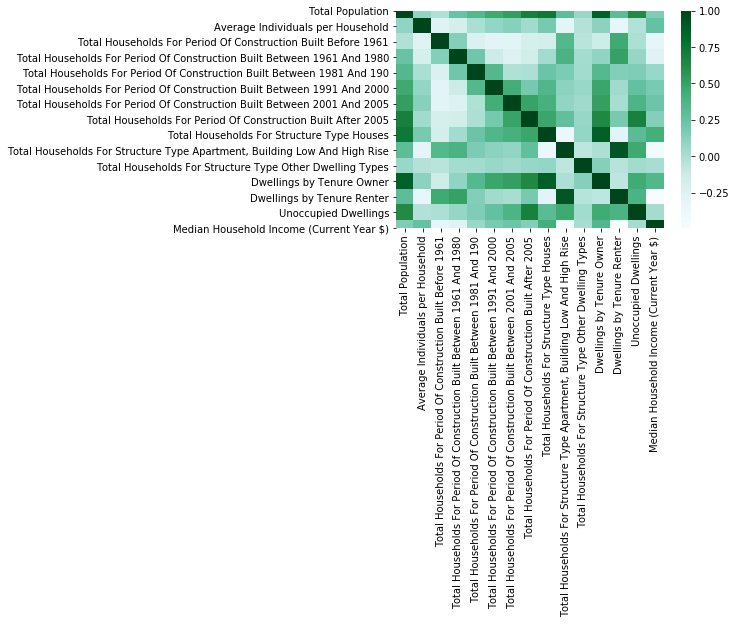

In [3]:
sns.heatmap(data.corr(),xticklabels=data.columns,yticklabels=data.columns,cmap='BuGn')

In [4]:
data.corr().iloc[11,0]

0.8691338008340058

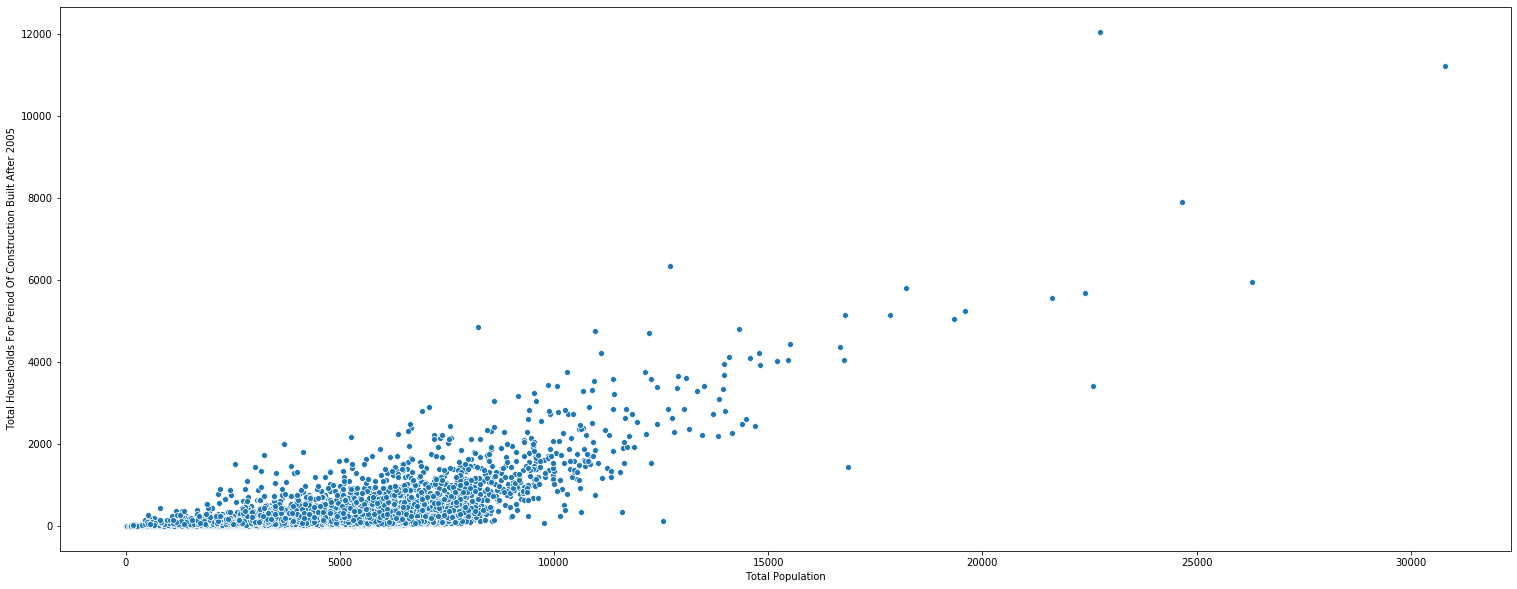

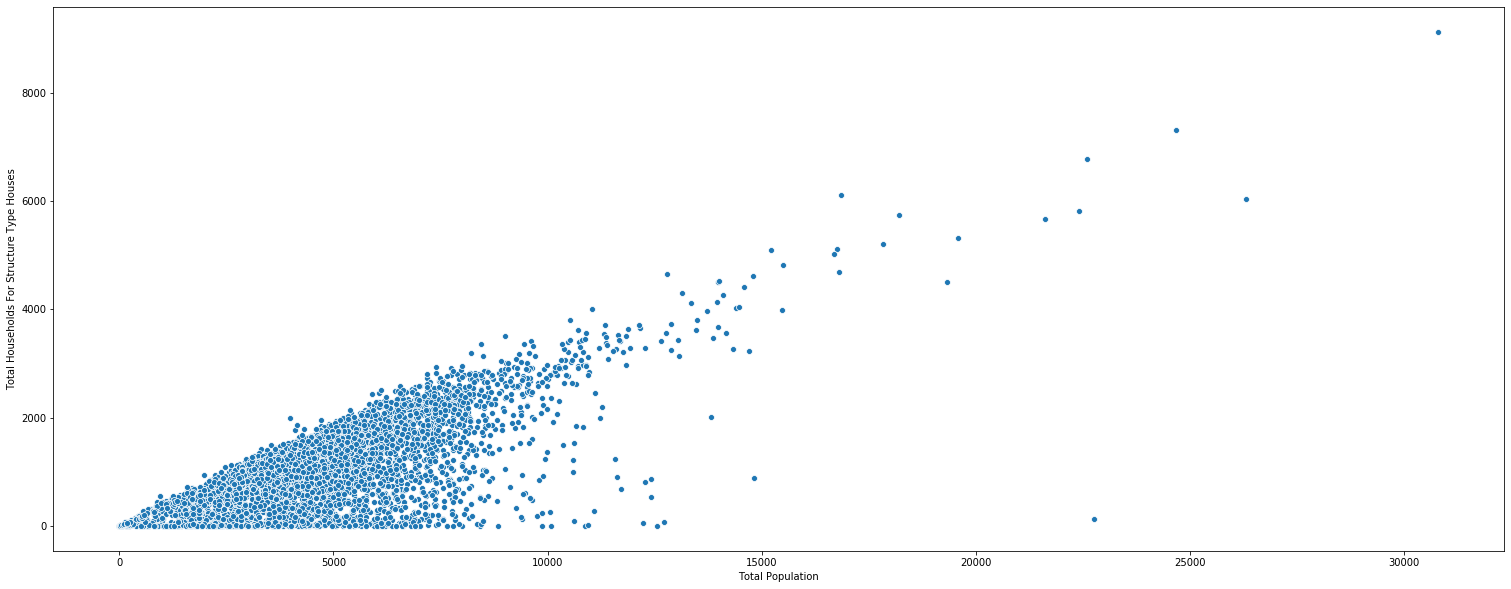

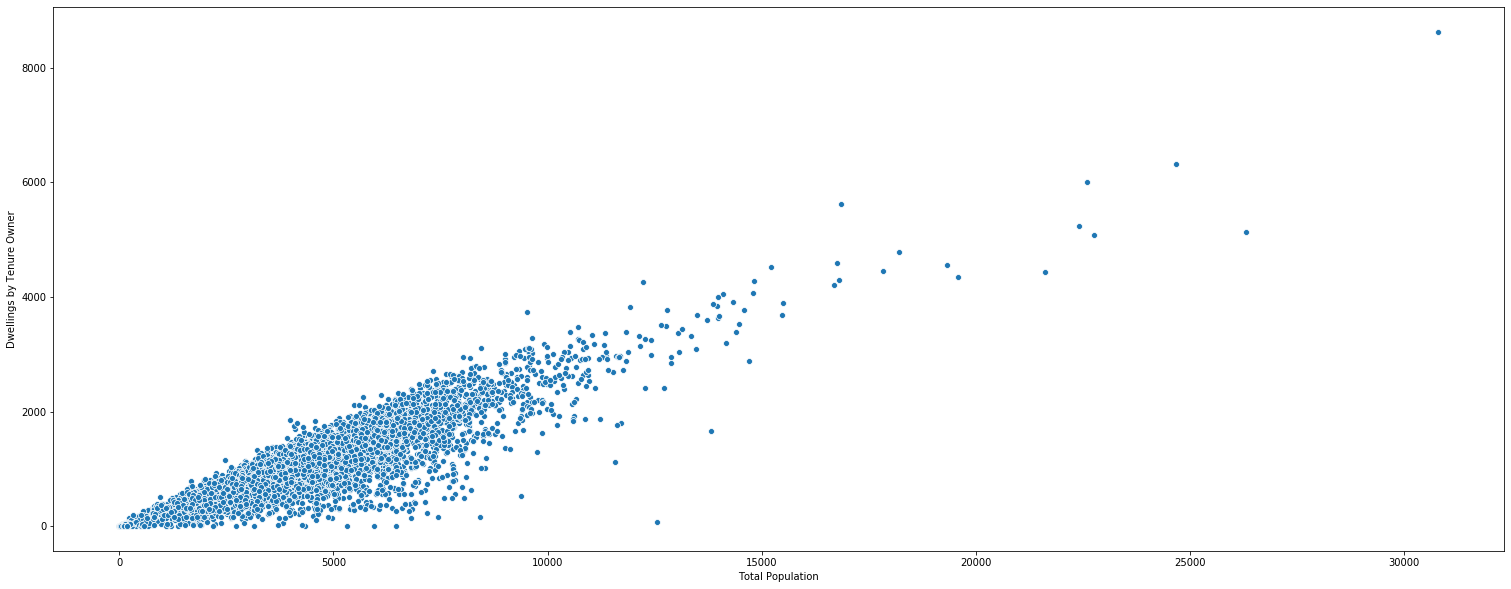

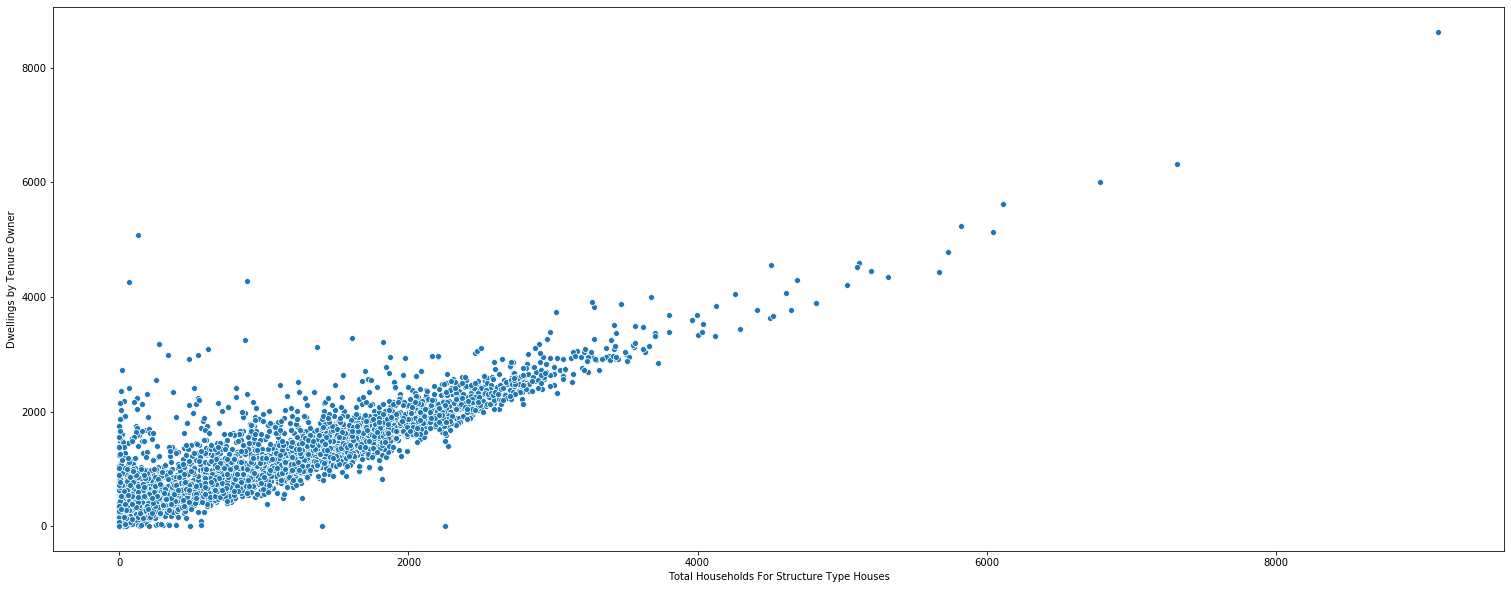

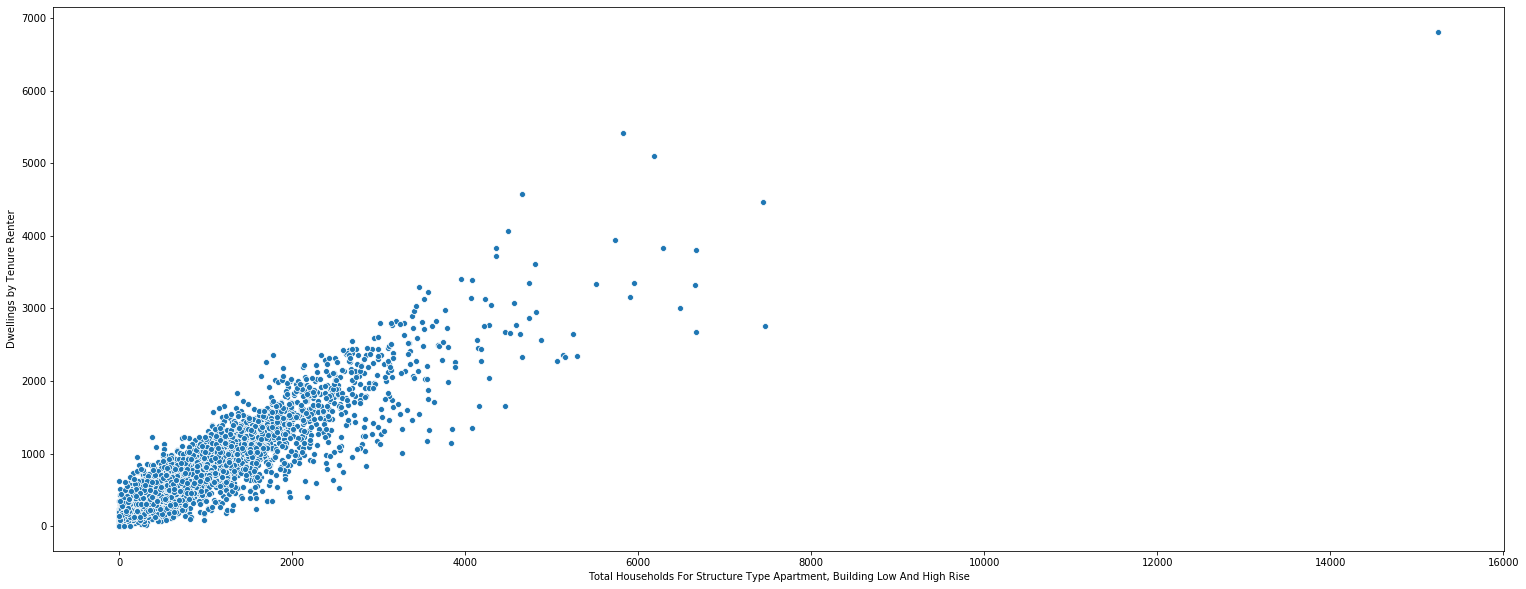

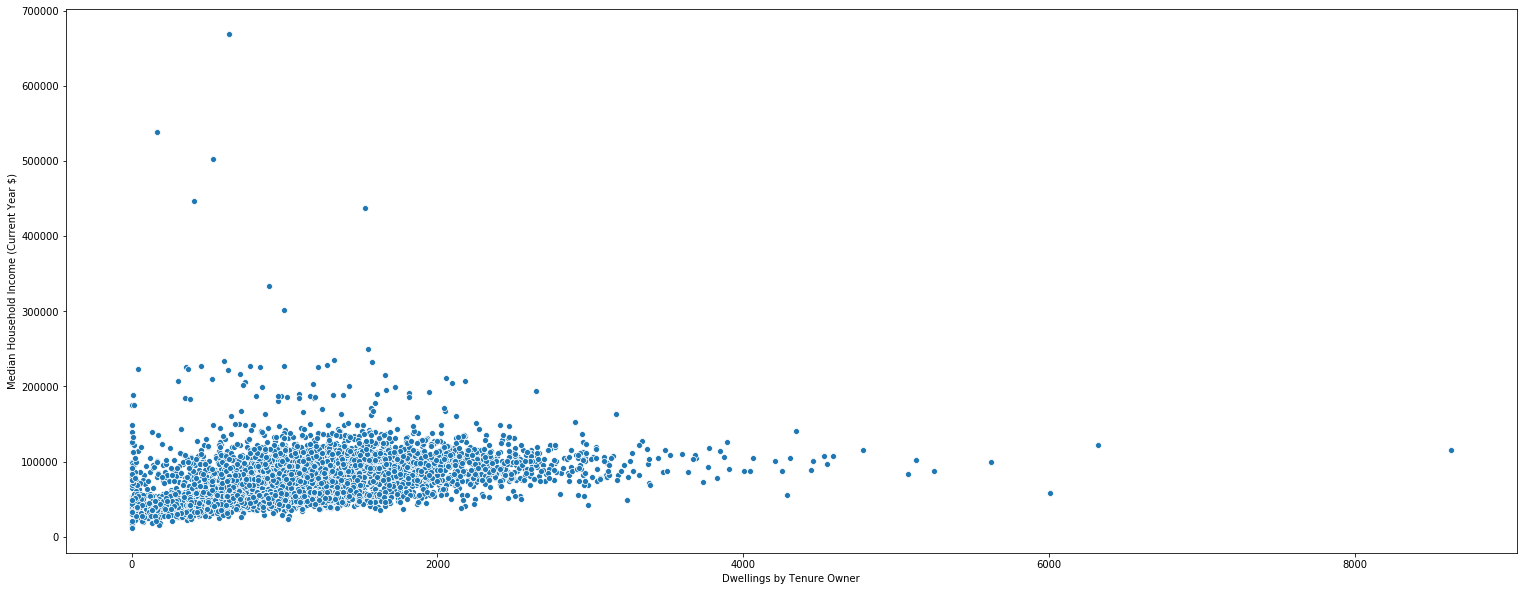

In [5]:
# visualizing highly correlated variables based on the above correlation matrix
plt.figure(figsize=(26, 10))
sns.scatterplot(x = data.columns[0], data = data, y = data.columns[7])

plt.figure(figsize=(26, 10))
sns.scatterplot(x = data.columns[0], data = data, y = data.columns[8])

plt.figure(figsize=(26, 10))
sns.scatterplot(x = data.columns[0], data = data, y = data.columns[11])

plt.figure(figsize=(26, 10))
sns.scatterplot(x = data.columns[8], data = data, y = data.columns[11])

plt.figure(figsize=(26, 10))
sns.scatterplot(x = data.columns[9], data = data, y = data.columns[12])

plt.figure(figsize=(26, 10))
sns.scatterplot(x = data.columns[11], data = data, y = data.columns[14])

In [6]:
# Creating different scalers for predictors and target 
data_predictor  = data.iloc[:,0:-1]
data_target = pd.DataFrame(data.iloc[:,-1])
scaler_target = MinMaxScaler().fit(data_target)
scaler_predictor = MinMaxScaler().fit(data_predictor)

In [7]:
# Creating full normalized data
norm_data_target = pd.DataFrame(scaler_target.transform(data_target))
norm_data_target.columns = data_target.columns
norm_data_predictor = pd.DataFrame(scaler_predictor.transform(data_predictor))
norm_data_predictor.columns = data_predictor.columns
norm_data = pd.concat([norm_data_predictor,norm_data_target],axis =1)

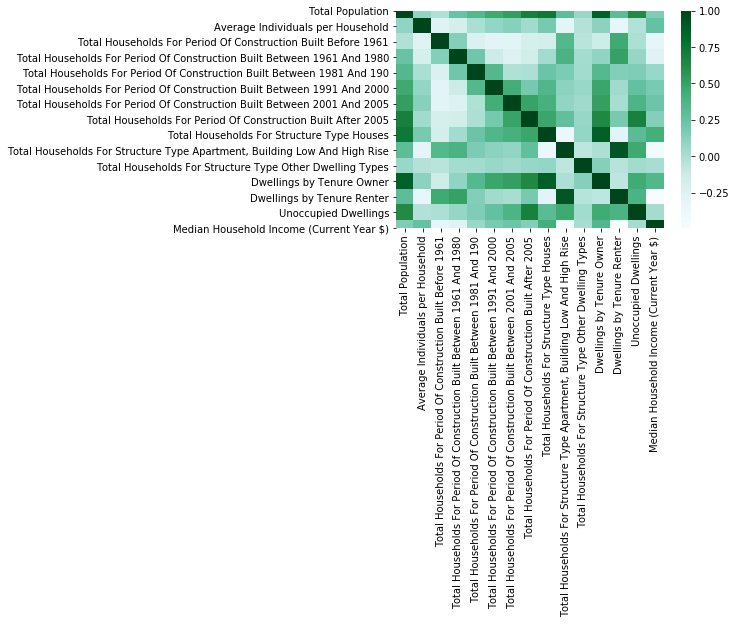

In [8]:
sns.heatmap(norm_data.corr(),xticklabels=norm_data.columns,yticklabels=norm_data.columns,cmap='BuGn')

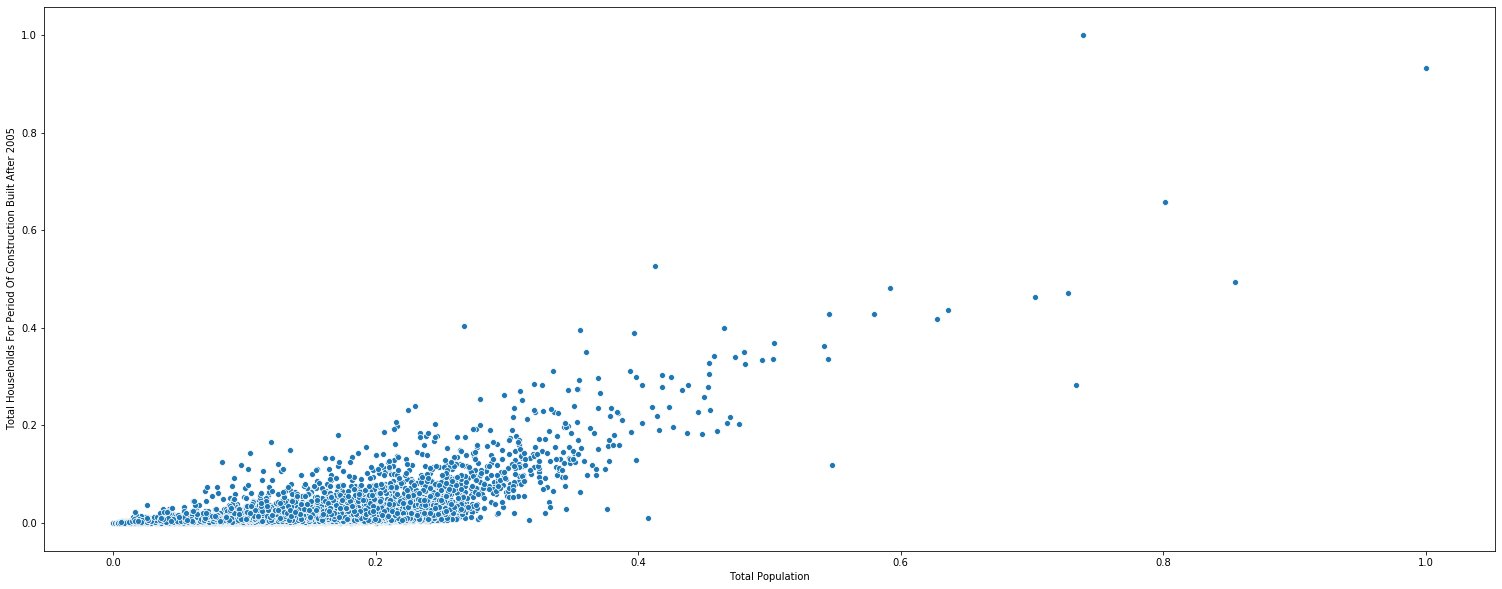

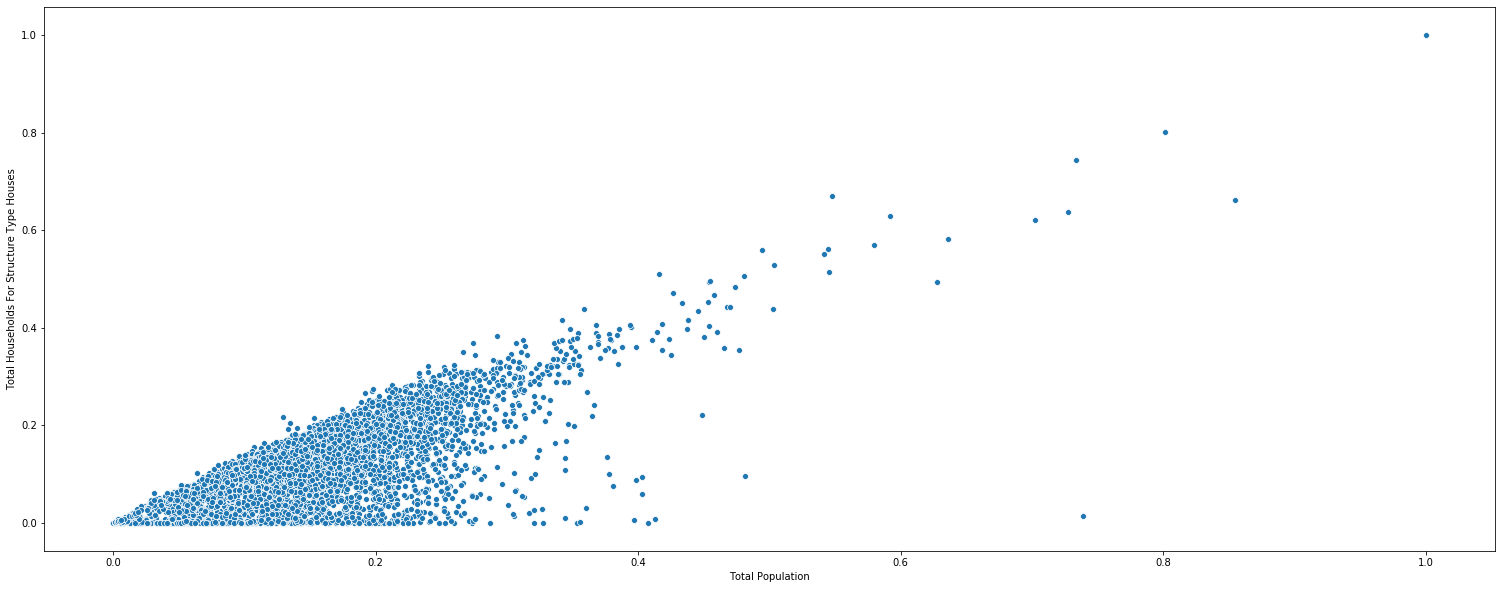

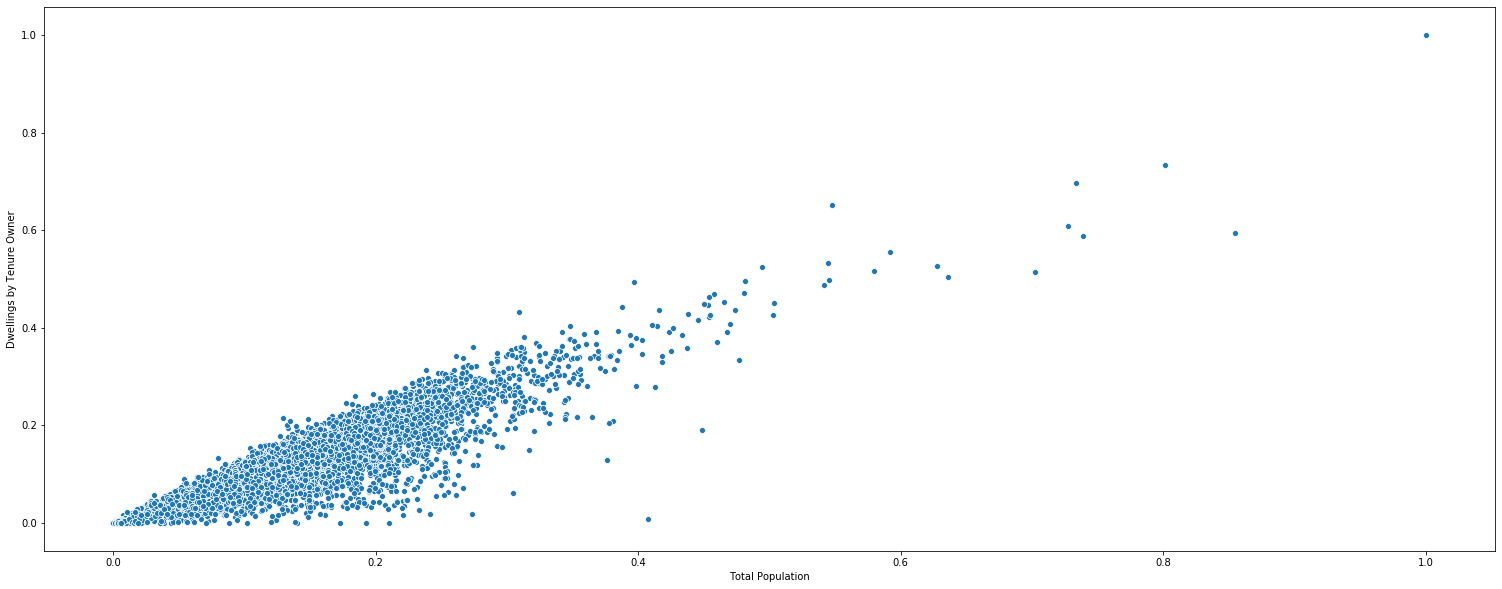

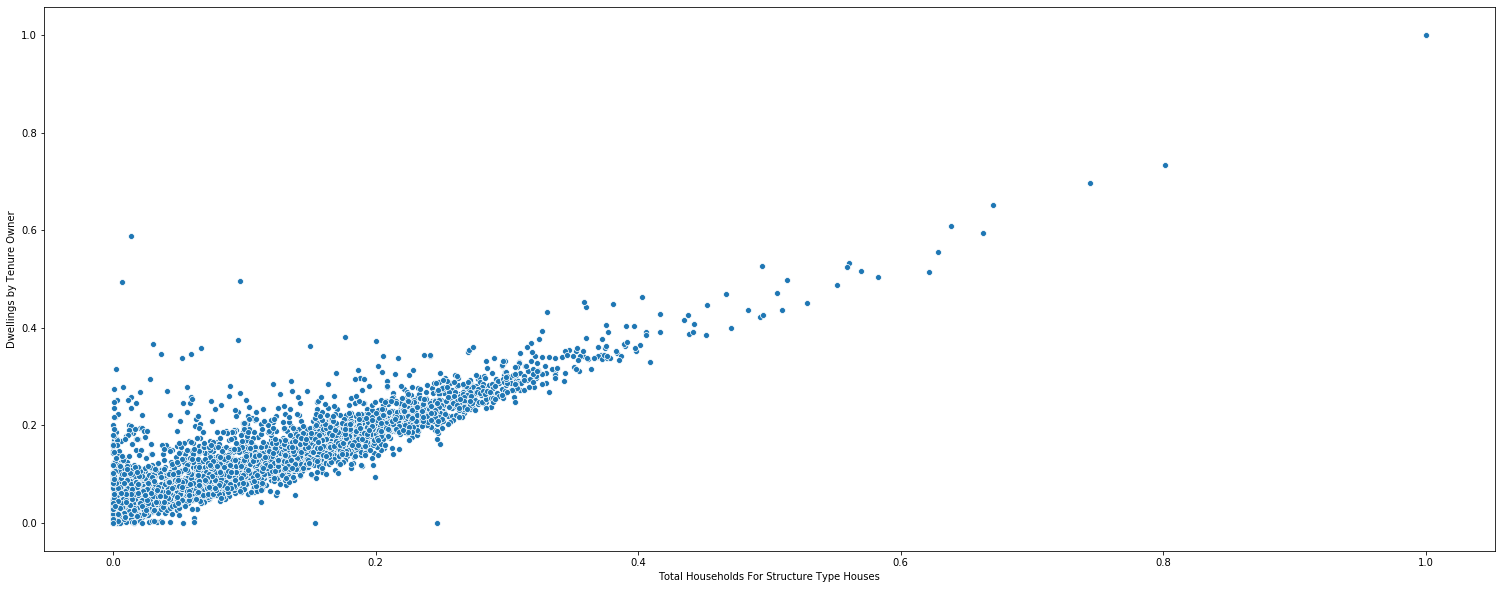

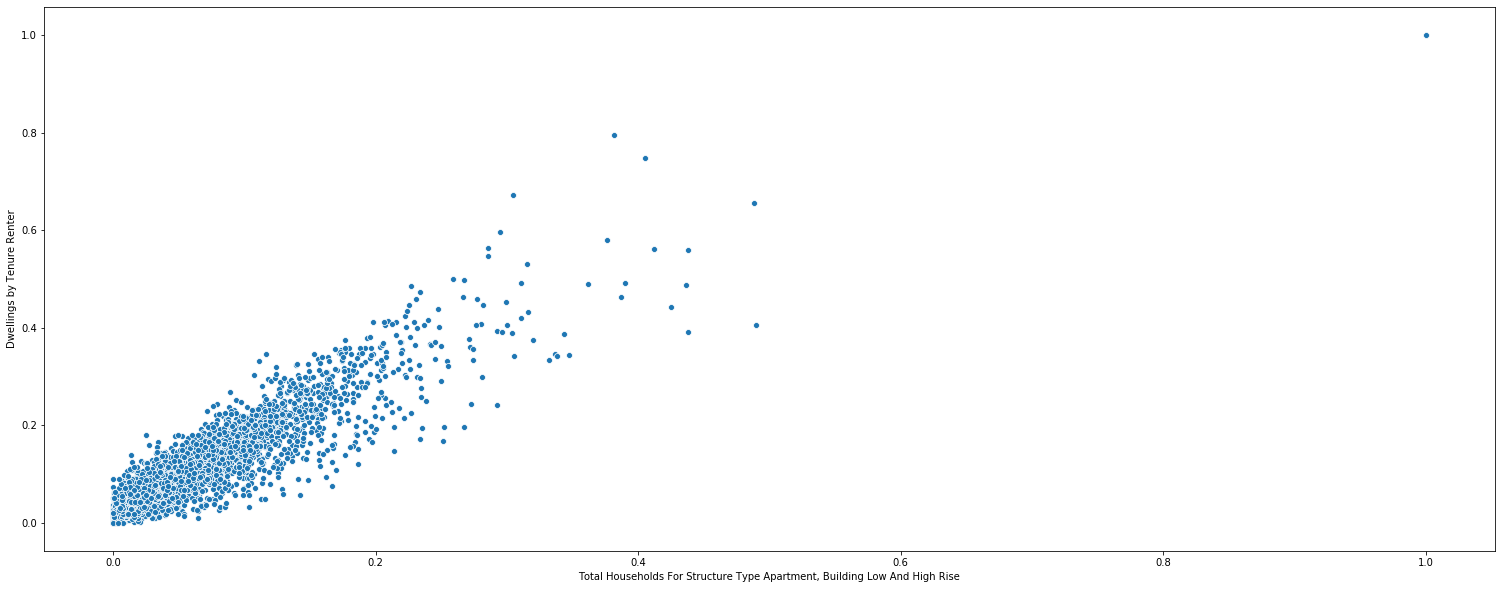

In [9]:
# visualizing highly correlated variables based on the above correlation matrix
plt.figure(figsize=(26, 10))
sns.scatterplot(x = norm_data.columns[0], data = norm_data, y = norm_data.columns[7])

plt.figure(figsize=(26, 10))
sns.scatterplot(x = norm_data.columns[0], data = norm_data, y = norm_data.columns[8])

plt.figure(figsize=(26, 10))
sns.scatterplot(x = norm_data.columns[0], data = norm_data, y = norm_data.columns[11])

plt.figure(figsize=(26, 10))
sns.scatterplot(x = norm_data.columns[8], data = norm_data, y = norm_data.columns[11])

plt.figure(figsize=(26, 10))
sns.scatterplot(x = norm_data.columns[9], data = norm_data, y = norm_data.columns[12])

In [10]:
# create a KMeans instance with 5 clusters
model = KMeans(n_clusters=5)

In [11]:
# fit model to points
model.fit(norm_data_predictor)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
labels = model.predict(norm_data_predictor)

In [13]:
norm_data1 =norm_data.copy()

In [14]:
norm_data1['cluster']=labels
norm_data1.head()

,Total Population,Average Individuals per Household,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter,Unoccupied Dwellings,Median Household Income (Current Year $),cluster
0,0.148277,0.024781,0.103277,0.380039,0.075287,0.058898,0.018568,0.014204,0.173627,0.032529,0.000000,0.179068,0.086893,0.0,0.088164,0
1,0.163251,0.052506,0.012858,0.009022,0.174138,0.219068,0.161362,0.014536,0.024444,0.078699,0.000000,0.107441,0.078820,0.0,0.114902,2
2,0.139734,0.028997,0.024886,0.162109,0.154598,0.207203,0.068966,0.020351,0.145128,0.010690,0.222787,0.182313,0.036841,0.0,0.081518,2
3,0.132913,0.034551,0.153463,0.125458,0.130460,0.084746,0.037577,0.017277,0.162447,0.001312,0.023948,0.166087,0.018788,0.0,0.115670,2
4,0.134277,0.023805,0.061800,0.327037,0.249425,0.033475,0.007515,0.007143,0.120026,0.054105,0.003628,0.150440,0.095846,0.0,0.086894,0


In [15]:
norm_data1['cluster'].value_counts()

2    1522
0    1044
1     986
4     729
3     699
Name: cluster, dtype: int64

In [16]:
#Finding the optimal number of clusters for k-means using cross validation
#initialize for loop to calculate silhouette_score for each #cluster
k_values = np.array([2,3,4,5,6,7,9,10])
silhouette_score_values=list()
for i in k_values:
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(norm_data_predictor)
    labels= classifier.predict(norm_data_predictor)
    print ('Number Of Clusters:')
    print (i)
    print ('Silhouette score value')
    print(silhouette_score(norm_data_predictor,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(silhouette_score(norm_data_predictor,labels,metric='euclidean', sample_size=None, random_state=None))


Number Of Clusters:
2
Silhouette score value
0.24014371975892038
Number Of Clusters:
3
Silhouette score value
0.2201906438305112
Number Of Clusters:
4
Silhouette score value
0.23590473561628286
Number Of Clusters:
5
Silhouette score value
0.23652557872864338
Number Of Clusters:
6
Silhouette score value
0.22331357583911704
Number Of Clusters:
7
Silhouette score value
0.23015933045890444
Number Of Clusters:
9
Silhouette score value
0.21330001400616927
Number Of Clusters:
10
Silhouette score value
0.2184269434649255


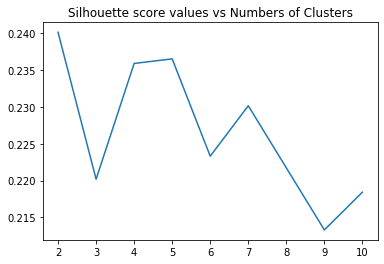

In [17]:
#plot the NumberOfClusters, silhouette_score_values
plt.plot(k_values, silhouette_score_values)
plt.title('Silhouette score values vs Numbers of Clusters')
plt.show()

In [18]:
#find optimal number of clusters
Optimal_NumOfClusters=k_values[silhouette_score_values.index(max(silhouette_score_values))]
print ('Optimal number of clusters is:',Optimal_NumOfClusters)

Optimal number of clusters is: 2


In [19]:
ks = range(1,6)
# Inertia: Sum of Square distance to respective centroid
inertias = []

In [20]:
for k in ks:
    # run k-means with k clusters
    model = KMeans(n_clusters=k)
    # fit the model
    model.fit(norm_data_predictor)
    # append inertia value
    inertias.append(model.inertia_)
inertias

[639.8566399679986,
 497.98394613167636,
 410.29620355418245,
 351.36251093275837,
 310.3087943691295]

([<matplotlib.axis.XTick at 0x182b8eb2e08>,
 <a list of 5 Text xticklabel objects>)

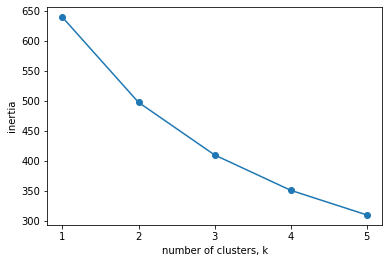

In [21]:
# plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)

# The optimal number of clusters within the population is 2

In [22]:
# Rerunning the model with 2 clusters - optimal 
bestmodel = KMeans(n_clusters=2)
bestmodel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
# fit model to points
bestmodel.fit(norm_data_predictor)
Newlabels = bestmodel.predict(norm_data_predictor)
Newlabels

array([0, 1, 1, ..., 1, 1, 1])

In [24]:
norm_data2 =norm_data.copy()

In [25]:
norm_data2['cluster']=Newlabels
norm_data2.head()

,Total Population,Average Individuals per Household,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter,Unoccupied Dwellings,Median Household Income (Current Year $),cluster
0,0.148277,0.024781,0.103277,0.380039,0.075287,0.058898,0.018568,0.014204,0.173627,0.032529,0.000000,0.179068,0.086893,0.0,0.088164,0
1,0.163251,0.052506,0.012858,0.009022,0.174138,0.219068,0.161362,0.014536,0.024444,0.078699,0.000000,0.107441,0.078820,0.0,0.114902,1
2,0.139734,0.028997,0.024886,0.162109,0.154598,0.207203,0.068966,0.020351,0.145128,0.010690,0.222787,0.182313,0.036841,0.0,0.081518,1
3,0.132913,0.034551,0.153463,0.125458,0.130460,0.084746,0.037577,0.017277,0.162447,0.001312,0.023948,0.166087,0.018788,0.0,0.115670,0
4,0.134277,0.023805,0.061800,0.327037,0.249425,0.033475,0.007515,0.007143,0.120026,0.054105,0.003628,0.150440,0.095846,0.0,0.086894,0


In [26]:
norm_data2['cluster'].value_counts()

0    2998
1    1982
Name: cluster, dtype: int64

In [27]:
data1 = data.copy()
data1['cluster']=Newlabels

In [28]:
c1 = data1[data1['cluster']==0]
c1['Median Household Income (Current Year $)'].describe()

count      2998.000000
mean      68135.021765
std       33853.127068
min       11334.980000
25%       47203.335000
50%       60130.985000
75%       82351.357500
max      669559.560000
Name: Median Household Income (Current Year $), dtype: float64

In [29]:
c2 = data1[data1['cluster']==1]
c2['Median Household Income (Current Year $)'].describe()

count      1982.000000
mean      91794.431095
std       26054.954446
min       27089.510000
25%       77176.152500
50%       91088.545000
75%      105487.427500
max      437853.930000
Name: Median Household Income (Current Year $), dtype: float64

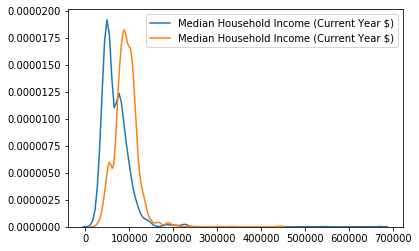

In [30]:
# distribution of median household income for the first cluster
fig, ax = plt.subplots()
sns.kdeplot(c1['Median Household Income (Current Year $)'], ax=ax)
sns.kdeplot(c2['Median Household Income (Current Year $)'], ax=ax)

(1, 10)

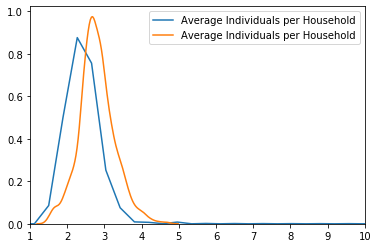

In [31]:
# distribution of median household income for the first cluster
fig, ax = plt.subplots()
sns.kdeplot(c1['Average Individuals per Household'], ax=ax)
sns.kdeplot(c2['Average Individuals per Household'], ax=ax)
plt.xlim(1, 10)

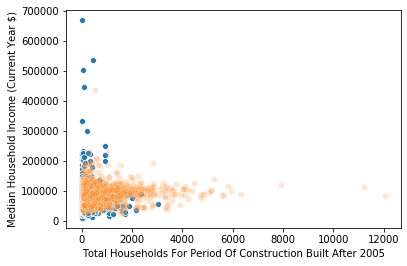

In [32]:
# distribution of median household income for the first cluster
fig, ax = plt.subplots()
sns.scatterplot(y=c1['Median Household Income (Current Year $)'],
                x=c1['Total Households For Period Of Construction Built After 2005'],
                ax=ax)
sns.scatterplot(y=c2['Median Household Income (Current Year $)'],
                x=c2['Total Households For Period Of Construction Built After 2005'],
                ax=ax,
                alpha=0.2)

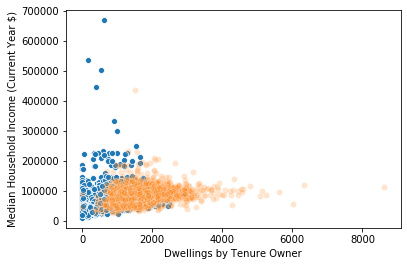

In [33]:
# distribution of median household income for the first cluster
fig, ax = plt.subplots()
sns.scatterplot(y=c1['Median Household Income (Current Year $)'],
                x=c1['Dwellings by Tenure Owner'],
                ax=ax,
                alpha=1)
sns.scatterplot(y=c2['Median Household Income (Current Year $)'],
                x=c2['Dwellings by Tenure Owner'],
                ax=ax,
                alpha=0.2)

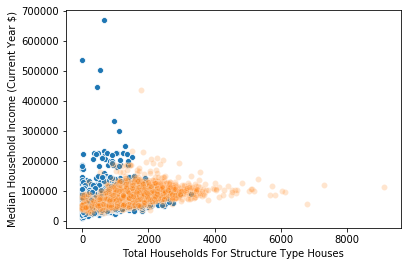

In [34]:
# distribution of median household income for the first cluster
fig, ax = plt.subplots()
sns.scatterplot(y=c1['Median Household Income (Current Year $)'],
                x=c1['Total Households For Structure Type Houses'],
                ax=ax,
                alpha=1)
sns.scatterplot(y=c2['Median Household Income (Current Year $)'],
                x=c2['Total Households For Structure Type Houses'],
                ax=ax,
                alpha=0.2)

## BIRCH Clustering with 2 Clusters

In [35]:
# Birch Clustering
brc = Birch(n_clusters=2,threshold = 0.05)
brc

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=2,
      threshold=0.05)

In [36]:
brc.fit(norm_data_predictor)
Birchlabels = brc.predict(norm_data_predictor)
Birchlabels

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
#Finding the optimal number of clusters for k-means using cross validation
#initialize for loop to calculate silhouette_score for each #cluster
k_values = np.array([2,3,4,5,6,7,9,10])
silhouette_score_values=list()
for i in k_values:
    classifier=Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=int(i), threshold=0.05)
    classifier.fit(norm_data_predictor)
    labels= classifier.predict(norm_data_predictor)
    print ('Number Of Clusters:')
    print (i)
    print ('Silhouette score value')
    print(silhouette_score(norm_data_predictor,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(silhouette_score(norm_data_predictor,labels,metric='euclidean', sample_size=None, random_state=None))


Number Of Clusters:
2
Silhouette score value
0.16454174163541932
Number Of Clusters:
3
Silhouette score value
0.15349356523492194
Number Of Clusters:
4
Silhouette score value
0.16740534664267168
Number Of Clusters:
5
Silhouette score value
0.18582432290500983
Number Of Clusters:
6
Silhouette score value
0.1906522809875294
Number Of Clusters:
7
Silhouette score value
0.18430926360545014
Number Of Clusters:
9
Silhouette score value
0.18056833245103593
Number Of Clusters:
10
Silhouette score value
0.18041938938616028


In [39]:
data3 = data.copy()

In [40]:
data3['cluster'] = Birchlabels

In [41]:
data3['cluster'].value_counts()

0    2830
1    2150
Name: cluster, dtype: int64

In [42]:
brc_c1 = data3[data3['cluster']==0]
brc_c1['Median Household Income (Current Year $)'].describe()

count      2830.000000
mean      87366.529131
std       33774.427641
min       11334.980000
25%       70096.795000
50%       86952.230000
75%      103212.740000
max      669559.560000
Name: Median Household Income (Current Year $), dtype: float64

In [43]:
brc_c2 = data3[data3['cluster']==1]
brc_c2['Median Household Income (Current Year $)'].describe()

count      2150.000000
mean      64631.665228
std       27190.509032
min       16000.930000
25%       46163.095000
50%       57426.970000
75%       78569.227500
max      333387.120000
Name: Median Household Income (Current Year $), dtype: float64

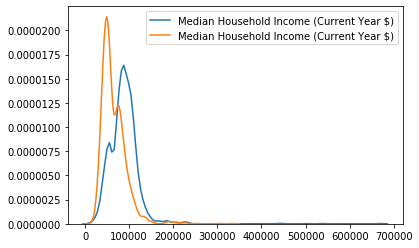

In [44]:
# distribution of median household income for the first cluster
fig, ax = plt.subplots()
sns.kdeplot(brc_c1['Median Household Income (Current Year $)'], ax=ax)
sns.kdeplot(brc_c2['Median Household Income (Current Year $)'], ax=ax)

(1, 10)

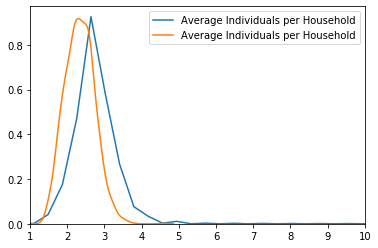

In [45]:
# distribution of median household income for the first cluster
fig, ax = plt.subplots()
sns.kdeplot(brc_c1['Average Individuals per Household'], ax=ax)
sns.kdeplot(brc_c2['Average Individuals per Household'], ax=ax)
plt.xlim(1, 10)

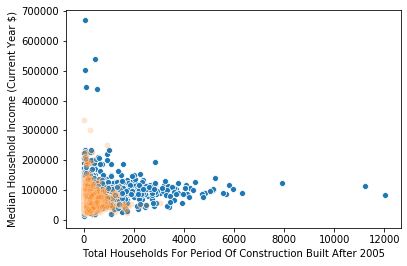

In [46]:
# distribution of median household income for the first cluster
fig, ax = plt.subplots()
sns.scatterplot(y=brc_c1['Median Household Income (Current Year $)'],
                x=brc_c1['Total Households For Period Of Construction Built After 2005'],
                ax=ax)
sns.scatterplot(y=brc_c2['Median Household Income (Current Year $)'],
                x=brc_c2['Total Households For Period Of Construction Built After 2005'],
                ax=ax,
                alpha=0.2)

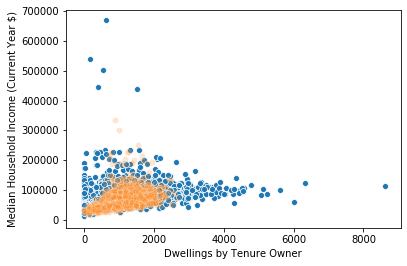

In [47]:
# distribution of median household income for the first cluster
fig, ax = plt.subplots()
sns.scatterplot(y=brc_c1['Median Household Income (Current Year $)'],
                x=brc_c1['Dwellings by Tenure Owner'],
                ax=ax,
                alpha=1)
sns.scatterplot(y=brc_c2['Median Household Income (Current Year $)'],
                x=brc_c2['Dwellings by Tenure Owner'],
                ax=ax,
                alpha=0.2)

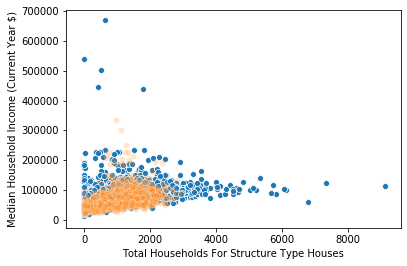

In [48]:
# distribution of median household income for the first cluster
fig, ax = plt.subplots()
sns.scatterplot(y=brc_c1['Median Household Income (Current Year $)'],
                x=brc_c1['Total Households For Structure Type Houses'],
                ax=ax,
                alpha=1)
sns.scatterplot(y=brc_c2['Median Household Income (Current Year $)'],
                x=brc_c2['Total Households For Structure Type Houses'],
                ax=ax,
                alpha=0.2)

## Regression to Estimate using KNeighborsRegressor

In [49]:
# create variables for the normalized data of each cluster from both model types
norm_data2 = pd.concat([norm_data_predictor,norm_data_target], axis = 1)
norm_data3 = pd.concat([norm_data_predictor, norm_data_target], axis = 1)
norm_data2['cluster'] = Newlabels
norm_data3['cluster'] = Birchlabels
kmn1 = norm_data2[norm_data2['cluster']==0]
kmn2 = norm_data2[norm_data2['cluster']==1]
brc1 = norm_data3[norm_data3['cluster']==0]
brc2 = norm_data3[norm_data3['cluster']==1]

In [50]:
# splitting the first k means cluster data into training and validation using a 75%:25% split ratio
kmn1_X_train, kmn1_X_test, kmn1_Y_train, kmn1_Y_test = train_test_split(kmn1.iloc[:,0:-2], kmn1.iloc[:,-2:-1], test_size=0.25, random_state=0)

In [51]:
# splitting the second k means cluster into training and validation using a 75%:25% split ratio
kmn2_X_train, kmn2_X_test, kmn2_Y_train, kmn2_Y_test = train_test_split(kmn2.iloc[:,0:-2], kmn2.iloc[:,-2:-1], test_size=0.25, random_state=0)

In [52]:
# splitting the first BIRCH cluster data into training and validation using a 75%:25% split ratio
brc1_X_train, brc1_X_test, brc1_Y_train, brc1_Y_test = train_test_split(brc1.iloc[:,0:-2], brc1.iloc[:,-2:-1], test_size=0.25, random_state=0)

In [53]:
# splitting the second BIRCH cluster into training and validation using a 75%:25% split ratio
brc2_X_train, brc2_X_test, brc2_Y_train, brc2_Y_test = train_test_split(brc2.iloc[:,0:-2], brc2.iloc[:,-2:-1], test_size=0.25, random_state=0)

In [54]:
# cross validation on first k means cluster
kfold = KFold(n_splits=10, random_state=0)
cv_results = cross_val_score(KNeighborsRegressor(), kmn1_X_train, kmn1_Y_train, cv=kfold, scoring="neg_mean_squared_error")
msg = "KNN: %f (%f)" % (cv_results.mean(),cv_results.std())
print(msg)

KNN: -0.001813 (0.000968)


In [55]:
# cross validation on second k means cluster
kfold = KFold(n_splits=10, random_state=0)
cv_results = cross_val_score(KNeighborsRegressor(), kmn2_X_train, kmn2_Y_train, cv=kfold, scoring="neg_mean_squared_error")
msg = "KNN: %f (%f)" % (cv_results.mean(),cv_results.std())
print(msg)

KNN: -0.001116 (0.000574)


In [56]:
# cross validation on first BIRCH cluster
kfold = KFold(n_splits=10, random_state=0)
cv_results = cross_val_score(KNeighborsRegressor(), brc1_X_train, brc1_Y_train, cv=kfold, scoring="neg_mean_squared_error")
msg = "KNN: %f (%f)" % (cv_results.mean(),cv_results.std())
print(msg)

KNN: -0.002276 (0.001508)


In [57]:
# cross validation on second BIRCH cluster
kfold = KFold(n_splits=10, random_state=0)
cv_results = cross_val_score(KNeighborsRegressor(), brc2_X_train, brc2_Y_train, cv=kfold, scoring="neg_mean_squared_error")
msg = "KNN: %f (%f)" % (cv_results.mean(),cv_results.std())
print(msg)

KNN: -0.000893 (0.000407)


In [62]:
# applying ridge regression on first k-means cluster
ridge1=Ridge()
ridge1.fit(kmn1_X_train,kmn1_Y_train)
kmn1_ridge_mse=(mean_squared_error(y_true=kmn1_Y_test,y_pred=ridge1.predict(kmn1_X_test)))
print(kmn1_ridge_mse)

0.002058160491291217


In [64]:
# applying ridge regression on second k-means cluster
ridge2=Ridge()
ridge2.fit(kmn2_X_train,kmn2_Y_train)
kmn2_ridge_mse=(mean_squared_error(y_true=kmn2_Y_test,y_pred=ridge2.predict(kmn2_X_test)))
print(kmn2_ridge_mse)

0.0008426121625012553


In [66]:
# applying ridge regression on first BIRCH cluster
ridge1.fit(brc1_X_train,brc1_Y_train)
brc1_ridge_mse=(mean_squared_error(y_true=brc1_Y_test,y_pred=ridge1.predict(brc1_X_test)))
print(brc1_ridge_mse)

0.0011942899881663826


In [67]:
# applying ridge regression on second BIRCH cluster
ridge2.fit(brc2_X_train,brc2_Y_train)
brc2_ridge_mse=(mean_squared_error(y_true=brc2_Y_test,y_pred=ridge2.predict(brc2_X_test)))
print(brc2_ridge_mse)

0.0009464612628538265


In [68]:
# applying lasso regression on first k-means cluster
lasso1=Lasso()
lasso1.fit(kmn1_X_train,kmn1_Y_train)
kmn1_lasso_mse=(mean_squared_error(y_true=kmn1_Y_test,y_pred=lasso1.predict(kmn1_X_test)))
print(kmn1_lasso_mse)

0.002784241857156502


In [69]:
# applying lasso regression on second k-means cluster
lasso2=Lasso()
lasso2.fit(kmn2_X_train,kmn2_Y_train)
kmn2_lasso_mse=(mean_squared_error(y_true=kmn2_Y_test,y_pred=lasso2.predict(kmn2_X_test)))
print(kmn2_lasso_mse)

0.001385158336079043


In [70]:
# applying lasso regression on first  BIRCH cluster
lasso1.fit(brc1_X_train,brc1_Y_train)
brc1_lasso_mse=(mean_squared_error(y_true=brc1_Y_test,y_pred=lasso1.predict(brc1_X_test)))
print(brc1_lasso_mse)

0.00186834612156091


In [71]:
# applying lasso regression on second BIRCH cluster
lasso2.fit(brc2_X_train,brc2_Y_train)
brc2_lasso_mse=(mean_squared_error(y_true=brc2_Y_test,y_pred=lasso2.predict(brc2_X_test)))
print(brc2_lasso_mse)

0.0016016355365259794


In [72]:
len(kmn2_Y_test)

496

# K-means clustering is best, and KNN is best for Cluster 1 whereas Ridge is best for Cluster2

In [74]:
# Determining optimal K- value for KNN
# define the parameters for the GridSearchCV
k_values = np.array([1,3,5,7,9,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
grid=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=param_grid,scoring="neg_mean_squared_error",cv=kfold)
grid_result=grid.fit(kmn1_X_train,kmn1_Y_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

Best: -0.001746 using {'n_neighbors': 13}


In [75]:
# show all results from the GridSearchCV
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %s" % (mean, stdev, param))

-0.002728 (0.001088) with {'n_neighbors': 1}
-0.001871 (0.000950) with {'n_neighbors': 3}
-0.001814 (0.000968) with {'n_neighbors': 5}
-0.001818 (0.000944) with {'n_neighbors': 7}
-0.001777 (0.000994) with {'n_neighbors': 9}
-0.001746 (0.000974) with {'n_neighbors': 13}
-0.001749 (0.001006) with {'n_neighbors': 15}
-0.001751 (0.001004) with {'n_neighbors': 17}
-0.001769 (0.001001) with {'n_neighbors': 19}
-0.001778 (0.001005) with {'n_neighbors': 21}


Text(0, 0.5, 'Error')

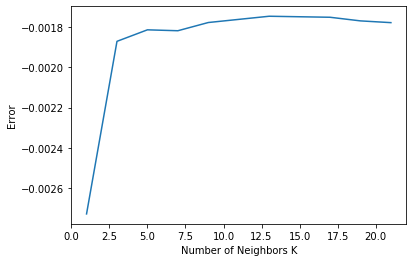

In [76]:
# plot the results from the GridSearchCV
plt.plot(k_values,means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Error")

In [77]:
# determining the optimal KNeighborsRegressor model based on the above GridSearchCV results
optimal_model = KNeighborsRegressor(n_neighbors=13)
optimal_model.fit(kmn1_X_train,kmn1_Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                    weights='uniform')

In [78]:
# predict the median income of the X test using the optimal KNN model
estimates = optimal_model.predict(kmn1_X_test)

In [79]:
mean_squared_error(kmn1_Y_test,estimates)

0.001798509788917306

## Running Regression on the Test Dataset

In [80]:
# now load the actual test data file in order to predict median income and cluster accordingly
test_data = pd.read_csv('CensusCanada2016Test.csv')

In [81]:
# normalize test data
norm_test_data = pd.DataFrame(scaler_predictor.transform(test_data))
norm_test_data.columns = test_data.columns

In [135]:
# create an index column to store the original order of the data prior to separation into 2 clusters
norm_test_data_index = norm_test_data.index.values
norm_test_data['index'] = norm_test_data_index

In [136]:
# fit model to the normalized test data using the best k mean model
bestmodel.fit(norm_test_data.loc[:,norm_test_data.columns!='index'])
testlabels = bestmodel.predict(norm_test_data.loc[:,norm_test_data.columns!='index'])
testlabels

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [137]:
norm_test_data1 =norm_test_data.copy()

In [139]:
norm_test_data1['cluster']=testlabels
norm_test_data1.head()

,Total Population,Average Individuals per Household,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter,Unoccupied Dwellings,index,cluster
0,0.087375,0.041752,0.006221,0.005920,0.026437,0.274576,0.050398,0.004070,0.096788,0.000656,0.00000,0.091562,0.006752,0.0,0,0
1,0.126092,0.032549,0.007051,0.236538,0.125287,0.011441,0.014589,0.031315,0.112353,0.031873,0.00000,0.139893,0.028181,0.0,1,1
2,0.227758,0.031792,0.318125,0.173386,0.128161,0.184322,0.073386,0.046682,0.152362,0.090373,0.00000,0.177677,0.149567,0.0,2,1
3,0.296684,0.020644,0.638739,0.273189,0.251149,0.103390,0.202034,0.077249,0.230407,0.161398,0.01016,0.278396,0.268604,0.0,3,1
4,0.117322,0.043458,0.018250,0.026501,0.019540,0.048729,0.081344,0.057812,0.117176,0.006427,0.00000,0.120770,0.005578,0.0,4,1


In [140]:
# Predicting income on the test data using KNN Regressor
norm_test_data_c1= norm_test_data[norm_test_data1['cluster']==0]
norm_test_data_c2= norm_test_data[norm_test_data1['cluster']==1]

In [141]:
income_estimates_c1 = pd.DataFrame(optimal_model.predict(norm_test_data_c1.loc[:,norm_test_data_c1.columns!='index']))

In [142]:
# applying ridge regression on second k-means cluster
income_estimates_c2 = pd.DataFrame(ridge2.predict(norm_test_data_c2.loc[:,norm_test_data_c2.columns!='index']))

In [143]:
norm_test_data_c1['Predicted Median Household Income (Current Year $)'] = income_estimates_c1

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
norm_test_data_c1.head(10)

,Total Population,Average Individuals per Household,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter,Unoccupied Dwellings,index,Predicted Median Household Income (Current Year $)
0,0.087375,0.041752,0.006221,0.005920,0.026437,0.274576,0.050398,0.004070,0.096788,0.000656,0.000000,0.091562,0.006752,0.0,0,0.116440
7,0.237860,0.047291,0.040647,0.435297,0.209195,0.048729,0.018126,0.005814,0.121780,0.073518,0.000000,0.174548,0.095553,0.0,7,0.118485
8,0.154773,0.039152,0.056408,0.136171,0.116667,0.139831,0.050398,0.031896,0.177244,0.000000,0.023948,0.160408,0.013797,0.0,8,0.096403
10,0.102641,0.060683,0.000000,0.009867,0.177586,0.166949,0.014589,0.002824,0.064233,0.014363,0.000000,0.071164,0.018934,0.0,10,0.113301
11,0.185565,0.038261,0.004562,0.130251,0.555747,0.127119,0.066755,0.009718,0.178450,0.024528,0.004354,0.170376,0.055189,0.0,11,0.097616
12,0.238867,0.041859,0.023642,0.165492,0.185057,0.265254,0.131742,0.045353,0.265921,0.000656,0.000000,0.247218,0.020255,0.0,12,0.111195
13,0.145938,0.039146,0.029448,0.067945,0.218966,0.140678,0.032714,0.037960,0.146224,0.014166,0.004354,0.150440,0.022310,0.0,13,0.118511
15,0.234969,0.042526,0.000000,0.066817,0.145402,0.291525,0.207781,0.060055,0.259345,0.000328,0.000000,0.238642,0.024218,0.0,15,0.131361
16,0.301491,0.027318,0.012028,0.099239,0.432759,0.452119,0.489390,0.057895,0.277211,0.096800,0.000000,0.332870,0.120211,0.0,16,0.114872
17,0.136291,0.057658,0.005392,0.133916,0.270690,0.016949,0.005747,0.008140,0.112901,0.004919,0.003628,0.114859,0.007632,0.0,17,0.108517


In [145]:
norm_test_data_c2['Predicted Median Household Income (Current Year $)'] = income_estimates_c2

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
denorm_income_estimates_c1 = scaler_target.inverse_transform(income_estimates_c1)

In [147]:
denorm_income_estimates_c2 = scaler_target.inverse_transform(income_estimates_c2)

In [224]:
# concatonate the results in a dataframe ordered by cluster rather than raw test data index
index_list = np.concatenate((norm_test_data_c1['index'],norm_test_data_c2['index']))
estimate_results = np.concatenate((denorm_income_estimates_c1,denorm_income_estimates_c2))
unsorted_results = pd.concat([pd.DataFrame(index_list),pd.DataFrame(estimate_results)],axis=1)
unsorted_results.columns = ['index','Estimated Median Household Income (In Current Year $)']
sorted_results = unsorted_results.copy()
sorted_results.sort_values(by='index', inplace=True)
sorted_results.set_index('index',inplace=True)

In [225]:
# set estimate to zero if all predictors are zeros
is_all_zeros = list()
for i in range(norm_test_data1.shape[0]):
    if np.array(norm_test_data1.iloc[i,2:14]).sum()==0:
        is_all_zeros.append(0)
    else:
        is_all_zeros.append(1)

In [226]:
# reseting any estimate for rows with all zeros to be equal to zero as well
sorted_results['Estimated Median Household Income (In Current Year $)'] = sorted_results['Estimated Median Household Income (In Current Year $)'] * is_all_zeros

In [228]:
sorted_results.to_csv("yoseph_test_predictions.csv")

In [4]:
final_test_data = pd.read_csv("testdata.csv")

In [9]:
final_test_data = final_test_data.drop(['Unnamed: 0'],axis =1)


In [10]:
final_test_data.head()

,Total Population,Average Individuals per Household,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter,Unoccupied Dwellings,cluster,Estimated Median Household Income (In Current Year $)
0,2692,3.014558,15,21,46,648,114,49,883,10,0,790,46,0,1,87978.48462
1,3884,2.570483,17,839,218,27,33,377,1025,486,0,1207,192,0,0,79051.45531
2,7014,2.533960,767,615,223,435,166,562,1390,1378,0,1533,1019,0,0,72822.94511
3,9136,1.996067,1540,969,437,244,457,930,2102,2461,14,2402,1830,0,0,78350.95169
4,3614,3.096829,44,94,34,115,184,696,1069,98,0,1042,38,0,0,83572.55279


In [13]:
# describing  Cluster 1 of test.csv
final_test_data[final_test_data['cluster']==0]['Estimated Median Household Income (In Current Year $)'].describe()

count      407.000000
mean     63149.521598
std      14752.584696
min          0.000000
25%      55204.006585
50%      64592.015770
75%      73265.921365
max      93236.104070
Name: Estimated Median Household Income (In Current Year $), dtype: float64

In [14]:
# describing Cluster 2 of test.csv
final_test_data[final_test_data['cluster']==1]['Estimated Median Household Income (In Current Year $)'].describe()

count       314.000000
mean      81056.632027
std       14829.430046
min       41960.736920
25%       70976.837695
50%       83330.635385
75%       89874.414233
max      111854.573100
Name: Estimated Median Household Income (In Current Year $), dtype: float64